In [25]:
import pandas as pd
import numpy as np

In [26]:
train = pd.read_csv('train.csv')

## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data.

### Missing Data

We can use seaborn to visualize missing data.

<AxesSubplot:>

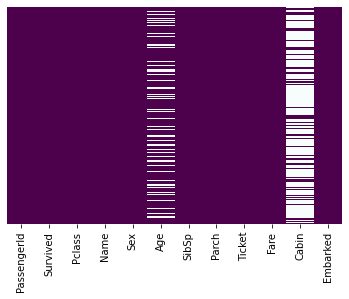

In [27]:
import seaborn as sns
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

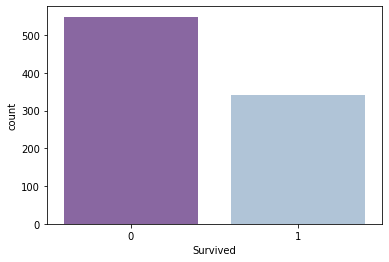

In [28]:
sns.set_style(None)
sns.countplot(x='Survived', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Sex', ylabel='count'>

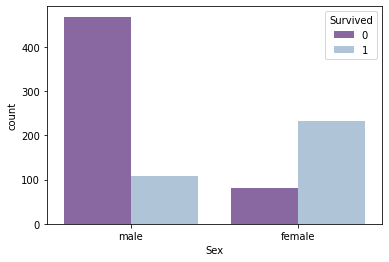

In [29]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

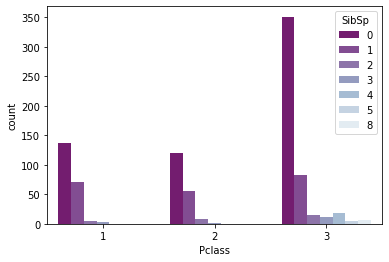

In [54]:
sns.countplot(x='Pclass', hue='SibSp', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

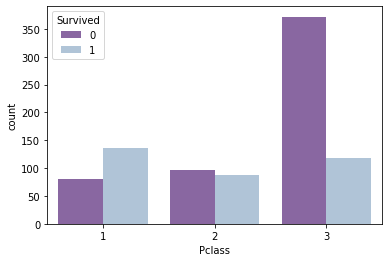

In [30]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='BuPu_r')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

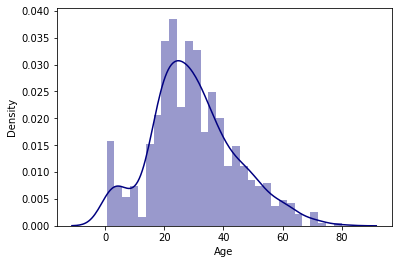

In [31]:
sns.distplot(train['Age'], color='navy', bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

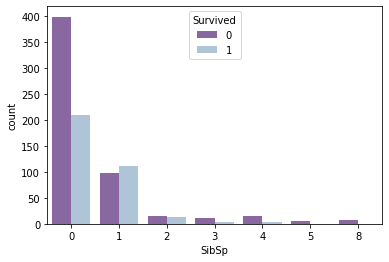

In [32]:
sns.countplot(x='SibSp', hue='Survived', data=train, palette='BuPu_r')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

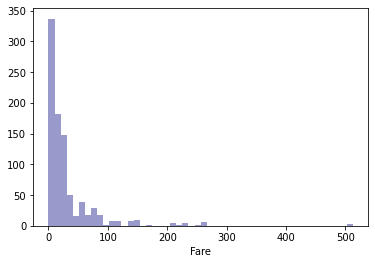

In [33]:
sns.distplot(train['Fare'], color='navy', bins=50, kde=False)

### Data Cleaning

The algorithms do not understand missing data so we need to tell the program exactly what to do with them. If we drop all missings observations, we drop a big chunk of the dataset. If we think age would be a good predictor of survival, then we should try to replace missing values.

- What are common approaches to deal with missing data?
- Make sure you know how does scikit-learn and pandas deal with missings.

Let's do a bit more explorations such as boxplots by survival category. 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

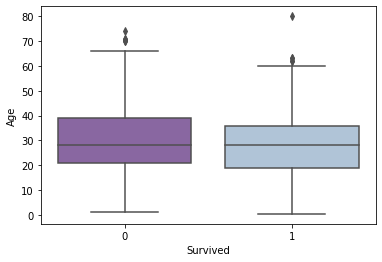

In [34]:
sns.boxplot(x='Survived', y='Age', data=train, palette='BuPu_r')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

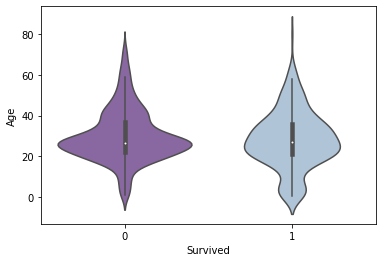

In [88]:
sns.violinplot(x='Survived', y='Age', data=train, palette='BuPu_r')

### Challenge: Interpret the boxplot of age (by survival).

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


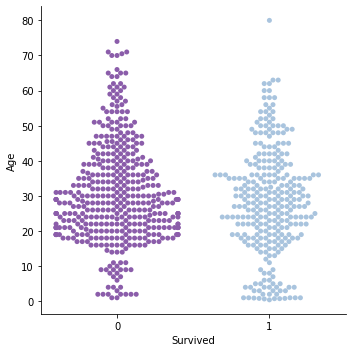

In [35]:
sns.catplot(y='Age', x='Survived', kind="swarm",  data=train,palette='BuPu_r')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


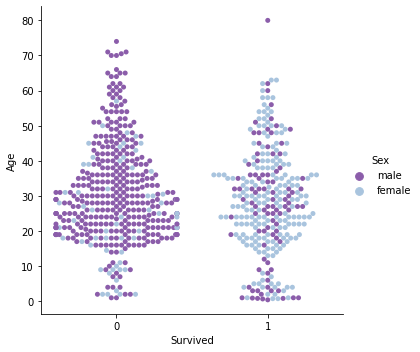

In [36]:
sns.catplot( x='Survived', y='Age', hue="Sex", kind="swarm", data=train, palette='BuPu_r')

In [37]:
#Now, let's finally replace some missing values :-)

train["Age"] = train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

<AxesSubplot:>

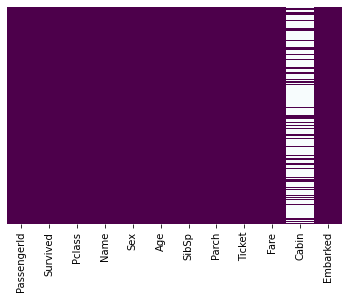

In [38]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r')

The Cabin column has a lot of missing values. We can create an indicator variable which takes value one in case cabin is missing.


In [64]:
train['cabin_missing'] = pd.isna(train['Cabin'])

train['cabin_missing'].describe()

count      891
unique       2
top       True
freq       687
Name: cabin_missing, dtype: object

## 1. Engineer at least two more features to include in your model 

(Examples are: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/). 

For each feature perform visualizations and interpret them.

### Feature 1

We created an additional feature: based on the name columns, we can figure out whether a married couple was travelling together.

In [49]:
def append_travelling_together(df):
    df["husbands_lastname"] = np.where(
        df["Name"].str.contains("(", regex=False),
        df["Name"].str.split(",").str[0],
        None,
    )

    husband_names = df["husbands_lastname"].unique().tolist()[1:]

    df["travelling_together_with_spouse"] = False
    for name in husband_names:
        possible_marriage = df.loc[
            lambda x: (x["SibSp"] > 0) & (x["Name"].str.contains(name))
        ]

        if possible_marriage.shape[0] != 2:  # not a pair
            pass

        else:
            df.loc[
                lambda x: (x["SibSp"] > 0) & (x["Name"].str.contains(name)),
                "travelling_together_with_spouse",
            ] = True
    return df["travelling_together_with_spouse"].values


train["travelling_together_with_spouse"] = append_travelling_together(train)

In [50]:
train.loc[lambda x: x["travelling_together_with_spouse"] == True].sort_values(
    by=["Name"]
).head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,husbands_lastname,travelling_together_with_spouse,cabin_missing
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,None,True,True
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,Abbott,True,True
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C,None,True,True
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,Abelson,True,True
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.80,NaN,S,None,True,True
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.80,NaN,S,Arnold-Franchi,True,True


<AxesSubplot:xlabel='Sex', ylabel='count'>

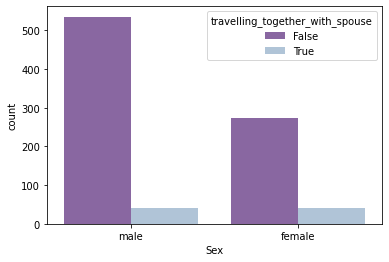

In [44]:
sns.countplot(x='Sex', hue='travelling_together_with_spouse', data=train, palette='BuPu_r')

More men travelled alone

In [75]:
train.groupby(["Sex","travelling_together_with_spouse"])["Survived"].mean().reset_index()

,Sex,travelling_together_with_spouse,Survived
0,female,False,0.725275
1,female,True,0.853659
2,male,False,0.175701
3,male,True,0.357143


Interestingly, couples had less chance to survive, both for women and men

<AxesSubplot:xlabel='SibSp', ylabel='count'>

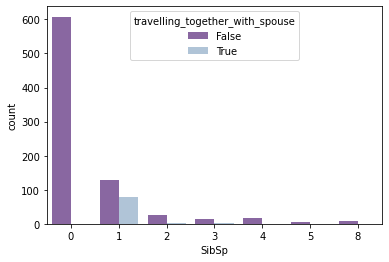

In [76]:
sns.countplot(x='SibSp', hue='travelling_together_with_spouse', data=train, palette='BuPu_r')

In [77]:
train.groupby("travelling_together_with_spouse")["SibSp"].value_counts()

travelling_together_with_spouse  SibSp
False                            0        608
                                 1        130
                                 2         26
                                 4         18
                                 3         14
                                 8          7
                                 5          5
True                             1         79
                                 2          2
                                 3          2
Name: SibSp, dtype: int64

Couples are more likely to travel together, but not with their children. Also, when travelling_together_with_spouse = False, there are a lot of SibSp, so those who travelled with their sibling or spouse are mutch more likely to travell with their sibling (and not spouse)

## Feature 2

There were some, who travelled without a Fare, maybe they are the crew?

In [102]:
train.loc[lambda x: x["Fare"]  < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,husbands_lastname,travelling_together_with_spouse,cabin_missing,sex,Age*Sex,age2
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,36.000000,1296.000000
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,None,False,False,1,40.000000,1600.000000
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,25.000000,625.000000
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.740707,0,0,239853,0.0,NaN,S,None,False,True,1,30.740707,944.991071
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,19.000000,361.000000
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.740707,0,0,239853,0.0,NaN,S,None,False,True,1,30.740707,944.991071
466,467,0,2,"Campbell, Mr. William",male,30.740707,0,0,239853,0.0,NaN,S,None,False,True,1,30.740707,944.991071
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.740707,0,0,239854,0.0,NaN,S,None,False,True,1,30.740707,944.991071
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,49.000000,2401.000000
633,634,0,1,"Parr, Mr. William Henry Marsh",male,41.281386,0,0,112052,0.0,NaN,S,None,False,True,1,41.281386,1704.152842


Idea: create a dummy indicating crew member or not?

 ## 2. Can you think of possible interactions and polynomials potentially relevant for your model? If yes, do so.

I would be interested in the interaction of Age and Sex. We know, that women has a greater chance of survival than men, but how does this relate to one's age?

In [84]:
train["sex"] = np.where(train["Sex"] == "male", 1, 0)

In [85]:
train["Age*Sex"] = train["Age"] * train["sex"]

Take Age squared, which seems a pretty basic idea

In [95]:
train["age2"] = train["Age"]**2

Also, Fare is quite skewed, maybe we should take a log, or impute some max value

<AxesSubplot:>

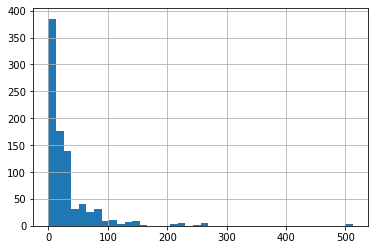

In [96]:
train["Fare"].hist(bins=40)

Also, there were some, whjo travelled without a Fare, maybe they are the crew?

In [100]:
train.loc[lambda x: x["Fare"]  < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,husbands_lastname,travelling_together_with_spouse,cabin_missing,sex,Age*Sex,age2
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,36.000000,1296.000000
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,None,False,False,1,40.000000,1600.000000
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,25.000000,625.000000
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.740707,0,0,239853,0.0,NaN,S,None,False,True,1,30.740707,944.991071
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,19.000000,361.000000
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.740707,0,0,239853,0.0,NaN,S,None,False,True,1,30.740707,944.991071
466,467,0,2,"Campbell, Mr. William",male,30.740707,0,0,239853,0.0,NaN,S,None,False,True,1,30.740707,944.991071
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.740707,0,0,239854,0.0,NaN,S,None,False,True,1,30.740707,944.991071
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,None,False,True,1,49.000000,2401.000000
633,634,0,1,"Parr, Mr. William Henry Marsh",male,41.281386,0,0,112052,0.0,NaN,S,None,False,True,1,41.281386,1704.152842


<AxesSubplot:>

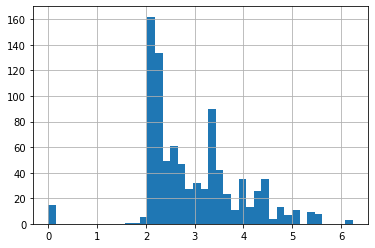

In [104]:
train["Fare"].apply(lambda x: np.log(x+1)).hist(bins=40)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,husbands_lastname,travelling_together_with_spouse,cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,None,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,None,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None,False,True


In [20]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [21]:
train.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Pclass', 'Cabin'], axis=1, inplace=True)

In [22]:
train = pd.concat([train, sex, embark, pclass], axis=1)

In [23]:
train.head()

,Survived,Age,SibSp,Parch,Fare,cabin_missing,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,1,0,1,0,1
1,1,38.0,1,0,71.2833,False,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,0,0,1,0,1
3,1,35.0,1,0,53.1000,False,0,0,1,0,0
4,0,35.0,0,0,8.0500,True,1,0,1,0,1


### Train Test Split
Let's start by splitting our data into a training set and test set.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = train.drop('Survived',axis=1)
y = train['Survived']
seed = 12

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify=y)

In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Prediction

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)

In [32]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
X_test = preprocessing.scale(X_test)
predictions = logreg.predict(X_test)

In [34]:
predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1])

### Model Evaluation

We can check precision, recall,f1-score using classification report.

<img src="../../slides/Figures/confusion-matrix.png">

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       137
           1       0.79      0.73      0.76        86

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [37]:
print(confusion_matrix(y_test, predictions))

[[120  17]
 [ 23  63]]


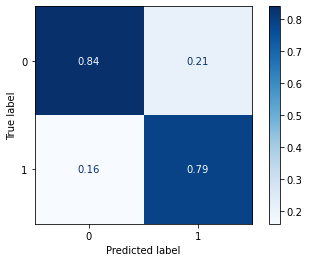

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

In [39]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Make sure you know what you are doing. Without understanding data, algorithm, and output, you might have very misleading results.

In [40]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [41]:
#print(confusion_matrix(y_test,dummy_clf.predict(X_test)))

In [42]:
print(classification_report(y_test, dummy_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       137
           1       0.00      0.00      0.00        86

    accuracy                           0.61       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.38      0.61      0.47       223



/Users/ariedamuco/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
dummy_clf.score(y_test, dummy_clf.predict(X_test))

1.0

In [44]:
dummy_clf.score(y_test, logreg.predict(X_test))

0.6412556053811659

### Challenge: Predict survival using the test dataset. How would you approach this exercise in terms of preprocessing and feature extraction?

<img src="../../slides/Figures/threefold-split.png">

### References
- Check [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) from Scikit Learn

- Check [Confusion Matrx](https://en.wikipedia.org/wiki/Confusion_matrix)

- Check [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

- [Plot confusion matrix](https://stackoverflow.com/questions/61466961/what-do-the-normalize-parameters-mean-in-sklearns-confusion-matrix)

- [Slides from Andreas Mueller](https://github.com/amueller/COMS4995-s19/tree/master/slides)